<a href="https://colab.research.google.com/github/DanB1421/DATA602/blob/main/Brilliant_Problem_Set_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

This problem set is a continuation of the analysis of weather data from the Week 3 assignment.  A copy of the transformed weather dataset is included in the template.  Beginning with this dataset, remove the prior temperature observation and split the data into test and training datasets.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


The below code loads a copy of the transformed data set posted as the solution for Week 3.  The prior temperature column is removed and a date column is added for reference.  (Alternatively, you can also use the transformed data set you produced in Week 3.)

In [ ]:
import pandas as pd

wdf = pd.read_parquet("/content/drive/Shareddrives/DS602-F22/Data/weather_clean.parquet")
wdf

,timeofday_sin,timeofday_cos,timeofyear_sin,timeofyear_cos,windspeed,precip,cloudcover,precip_intensity,tstorm,winter,mist,fog,temp,date
0,0.688355,-0.725374,0.999852,-0.017213,0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,6.1,2015-12-31 20:54:00-05:00
1,0.852640,-0.522499,0.999852,-0.017213,-0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,6.7,2015-12-31 21:54:00-05:00
2,0.958820,-0.284015,0.999852,-0.017213,0.000000,0.0,0.8,0.0,0.0,0.0,0.0,0.0,6.1,2015-12-31 22:54:00-05:00
3,0.999657,-0.026177,0.999852,-0.017213,-0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,5.6,2015-12-31 23:54:00-05:00
4,0.972370,0.233445,1.000000,0.000000,-0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,5.0,2016-01-01 00:54:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58461,-0.972370,-0.233445,-0.490029,-0.871706,0.769231,0.0,0.6,0.0,0.0,0.0,0.0,0.0,27.8,2022-09-02 12:54:00-04:00
58462,-0.878817,-0.477159,-0.490029,-0.871706,0.000000,0.0,0.6,0.0,0.0,0.0,0.0,0.0,28.9,2022-09-02 13:54:00-04:00
58463,-0.725374,-0.688355,-0.490029,-0.871706,0.576923,0.0,0.6,0.0,0.0,0.0,0.0,0.0,28.9,2022-09-02 14:54:00-04:00
58464,-0.522499,-0.852640,-0.490029,-0.871706,0.769231,0.0,0.6,0.0,0.0,0.0,0.0,0.0,29.4,2022-09-02 15:54:00-04:00


In [ ]:
# Remove the date column and split the data into test and training datasets.

y = wdf.pop('temp').values
X = wdf.drop('date', axis=1).values

## Prepare test and training datasets

Note: After running the above code, `X` and `y` store $\mathbf{X}$ and $\mathbf{y}$, respectively.

In [ ]:
N = 46773 # N is 80% of the dataset
X_train, y_train = X[:N, :], y[:N] # creates training data with 80% of dataset
X_test, y_test = X[N:, :], y[N:] # creates test data with remaining 20%

# Problem 1: Regressors

Build at least 3 regressors using different algorithms to predict the temperature.  At least one regressor should implement a tree-based algorithm (random forest, or gradient boosted tree/xgboost.)

In [ ]:
from sklearn.linear_model import LinearRegression
regr_linear = LinearRegression(fit_intercept=True)

In [ ]:
from sklearn.linear_model import RANSACRegressor
regr_RANSAC = RANSACRegressor(LinearRegression(),
                       residual_threshold = 5)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr_GradientBoost = GradientBoostingRegressor()

# Problem 2: Cross-Validation

Use cross-validation to test each algorithm, and select the estimator with the highest accuracy score.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(regr_linear, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.02


In [ ]:
scores = cross_val_score(regr_RANSAC, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.02


In [ ]:
scores = cross_val_score(regr_GradientBoost, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 accuracy with a standard deviation of 0.02


The Gradient Boost regression model appears to have the best accuracy score

# Problem 3: Most important features
Use one of the tree-based models to evaluate feature importance.  Which features are the most important?

Text(0.5, 1.0, 'Feature Importance (MDI)')

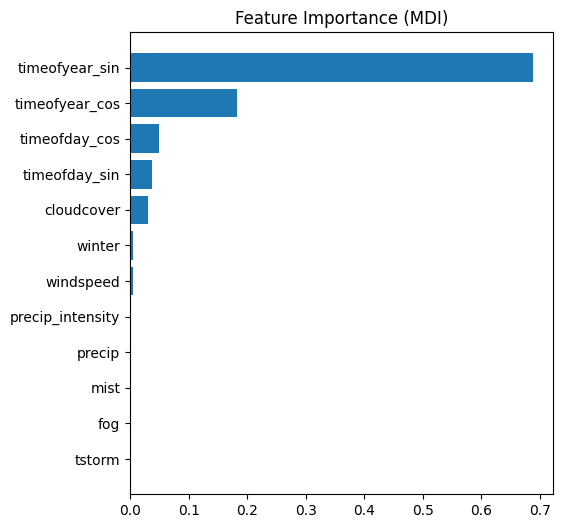

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
wdf_X = wdf.drop('date', axis=1)
feature_names = wdf_X.columns.values.tolist()
feature_importance = regr_GradientBoost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

According to measurement of mean decrease in impurity (MDI), the most important features are timeofyear_sin, timeofyear_cis, timeofday_cos, and timeofday_sin. Based on this, it is clear that time of year and time of day are what affect the regression model the most within the dataset.

# Problem 4: Residuals Plot
For the best model selected above, show a residuals plot ($\hat{y}$ vs. $\hat{y} - y$).  Does the residuals plot show evidence of uncaptured exploratory information?


Text(0, 0.5, 'Residuals')

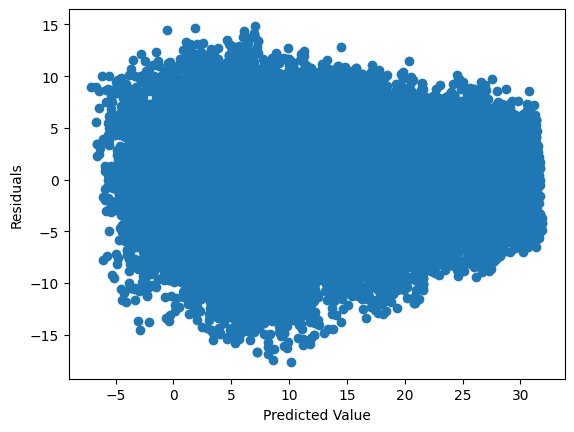

In [ ]:
y_pred = regr_GradientBoost.predict(X_train)
y_diff = y_pred - y_train
plt.scatter(y_pred, y_diff)
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')

The plot does not appear to show evidence of uncaptured exploratory information.

# Problem 5: Evaluation
Train the model with the highest accuracy score with the full training dataset.  Score the test data against this model.  Does the model demonstrate predictive validity?

In [ ]:
regr_GradientBoost.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
scores = cross_val_score(regr_GradientBoost, X_test, y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.29 accuracy with a standard deviation of 0.20


The accuracy score shows that the model does not demonstrate predictive validity.